In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
from sklearn import datasets, preprocessing
import numpy as np
import datetime as dt
import pandas as pd
import pandas.io.data as web
import urllib2
import csv

#Get Time Series Data

In [3]:
start_dt = dt.datetime(2015,1,1)
end_dt = dt.datetime(2016,3,24)

In [4]:
symbol = 'AMZN'
daily_data = web.DataReader(symbol, "yahoo", start_dt,end_dt)

In [5]:
daily_data.shape

(309, 6)

In [7]:
daily_data;

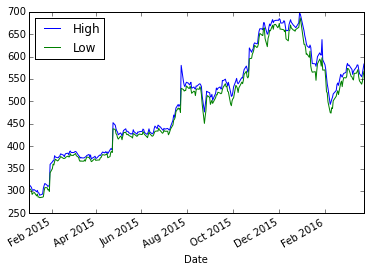

In [8]:
daily_data.ix[:,['High','Low']].plot()

In [9]:
daily_data.ix[0]

Open             312.579987
High             314.750000
Low              306.959991
Close            308.519989
Volume       2783200.000000
Adj Close        308.519989
Name: 2015-01-02 00:00:00, dtype: float64

In [10]:
daily_data.ix[0,'Open']

312.57998700000002

In [11]:
types = daily_data.columns.tolist() 

In [12]:
types

['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']

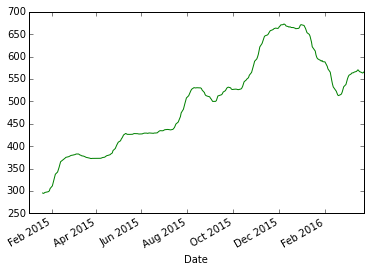

In [13]:
pd.rolling_mean(daily_data['Close'], window=12).plot(style='-g')

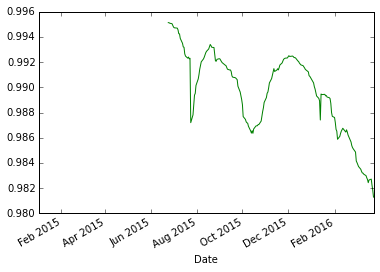

In [14]:
pd.rolling_corr(daily_data['Open'], daily_data['Close'], window=120).plot(style='-g')

In [15]:
close_change_df = daily_data['Close'].pct_change(1)

In [16]:
type(close_change_df)

pandas.core.series.Series

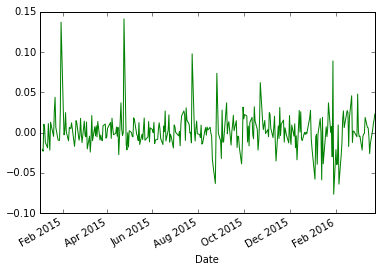

In [17]:
close_change_df.plot(style='-g')

#Create Percentage Change Data

In [18]:
freqs = range(1,20) # a list of periods to do percentage change over

In [19]:
for freq in freqs:
    for t in types:
        daily_data['i_'+ t + '_'+str(freq)] = daily_data[t].pct_change(periods=freq) # for each type of price,
        # compute the price change percentage for each period in the list

In [20]:
daily_data.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close',
       u'i_Open_1', u'i_High_1', u'i_Low_1', u'i_Close_1', 
       ...
       u'i_Low_18', u'i_Close_18', u'i_Volume_18', u'i_Adj Close_18',
       u'i_Open_19', u'i_High_19', u'i_Low_19', u'i_Close_19', u'i_Volume_19',
       u'i_Adj Close_19'],
      dtype='object', length=120)

In [21]:
daily_data.ix[-1,:]

Open                  567.109985
High                  583.549988
Low                   567.080017
Close                 582.950012
Volume            5141600.000000
Adj Close             582.950012
i_Open_1                0.010891
i_High_1                0.019337
i_Low_1                 0.016090
i_Close_1               0.023384
i_Volume_1              0.296387
i_Adj Close_1           0.023384
i_Open_2                0.040359
i_High_2                0.036943
i_Low_2                 0.040418
i_Close_2               0.040091
i_Volume_2              0.288331
i_Adj Close_2           0.040091
i_Open_3                0.033157
i_High_3                0.050987
i_Low_3                 0.052917
i_Close_3               0.052294
i_Volume_3             -0.000874
i_Adj Close_3           0.052294
i_Open_4                0.010999
i_High_4                0.037736
i_Low_4                 0.038437
i_Close_4               0.055916
i_Volume_4             -0.292112
i_Adj Close_4           0.055916
          

#Link Analysis

In [22]:
def prepare_changes_data(symbol, start_dt, end_dt, freqs):
    
    daily_data = web.DataReader(symbol, "yahoo", start_dt,end_dt)
    types = daily_data.columns.tolist()
    types.remove('Volume')

    for freq in freqs:
        for t in types:
            daily_data['i_'+ t + '_'+str(freq)] = daily_data[t].pct_change(periods=freq)
            
    return daily_data

In [23]:
daily_data =prepare_changes_data(symbol, start_dt,end_dt, freqs)

In [24]:
with open('/home/richard/Eclipse_workspace/nasdaq/nasdaq_companylist.csv') as f:
    content = f.readlines()

In [26]:
len(content)

3096

In [27]:
symbols = [l.split(',')[0].replace('"','') for l in content[1:]]

In [28]:
symbols[5]

'FLWS'

In [29]:
a_stock = prepare_changes_data(symbols[6], start_dt, end_dt, freqs)

In [30]:
a_stock.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close',
       u'i_Open_1', u'i_High_1', u'i_Low_1', u'i_Close_1', 
       ...
       u'i_Open_18', u'i_High_18', u'i_Low_18', u'i_Close_18',
       u'i_Adj Close_18', u'i_Open_19', u'i_High_19', u'i_Low_19',
       u'i_Close_19', u'i_Adj Close_19'],
      dtype='object', length=101)

In [31]:
feats = [f for f in a_stock.columns if 'i_' in f];

In [33]:
len(feats)

95

In [34]:
a_stock.shape

(309, 101)

In [35]:
a_stock.tail(1).ix[:,feats] # return last row

,i_Open_1,i_High_1,i_Low_1,i_Close_1,i_Adj Close_1,i_Open_2,i_High_2,i_Low_2,i_Close_2,i_Adj Close_2,...,i_Open_18,i_High_18,i_Low_18,i_Close_18,i_Adj Close_18,i_Open_19,i_High_19,i_Low_19,i_Close_19,i_Adj Close_19
Date,,,,,,,,,,,,,,,,,,,,,
2016-03-24,-0.000911,0,-0.003646,0.000912,0.000912,0.000912,-0.00363,-0.002737,0.000912,0.000912,...,0.357673,0.330909,0.399488,0.40589,0.40589,0.36783,0.363975,0.362843,0.363975,0.363975


In [36]:
import sys

In [37]:
start_dt=dt.datetime(2016,2,15)

In [38]:
start_dt

datetime.datetime(2016, 2, 15, 0, 0)

In [39]:
all_stocks = a_stock.tail(1).ix[:,feats]

In [40]:
my_symbols = [symbols[5]]

In [41]:
count = 0
total = 200
for i in range(7, int(total*1.2)):
    try:
        a_stock = prepare_changes_data(symbols[i], start_dt, end_dt, freqs)
        all_stocks=all_stocks.append(a_stock.tail(1).ix[:,feats])
        my_symbols.append(symbols[i])
        count+=1
        if( count % 20 ==0):
            print('done %d' % count)
        if(count >= total):
            break
    except:
        print('error getting data for %s: %s' % (symbols[i],sys.exc_info()[0]))
print('done')

error getting data for ABEOW: <type 'exceptions.IOError'>
error getting data for ABILW: <type 'exceptions.IOError'>
done 20
done 40
error getting data for AITPU: <type 'exceptions.IOError'>
error getting data for ADXSW: <type 'exceptions.IOError'>
done 60
error getting data for AGFSW: <type 'exceptions.IOError'>
done 80
done 100
done 120
done 140
done 160
error getting data for ANDAR: <type 'exceptions.IOError'>
error getting data for ANDAU: <type 'exceptions.IOError'>
error getting data for ANDAW: <type 'exceptions.IOError'>
done 180
done 200
done


In [42]:
all_stocks.shape

(201, 95)

In [43]:
close_feats = [f for f in a_stock.columns if 'i_Close' in f]

In [46]:
close_feats;

In [49]:
from sklearn.neighbors import BallTree

In [50]:
data = all_stocks[close_feats].as_matrix()

In [51]:
tree = BallTree(data, leaf_size=10, metric='minkowski') # p=2 for euclidean, p=1 for manhattan

In [53]:
tree;

In [54]:
query_data = all_stocks[close_feats].ix[0,:].astype(float) 

In [56]:
query_data;

In [58]:
dist_thr = 1.5

In [59]:
ind,dist = tree.query_radius(query_data, r=dist_thr,return_distance=True)

In [62]:
dist;

In [64]:
[my_symbols[i] for i in ind[0].tolist()];

In [65]:
sorted_sym = sorted(zip(ind[0].tolist(),dist[0].tolist()),key=lambda k: k[1], reverse=False)

In [70]:
my_symbols[sorted_sym[2][0]]

'ARCI'

In [71]:
def get_node(graph,data, field):
    node=None
    if field not in data:
        field_value = str(data)    
    else:
        field_value = str(data[field])
    
    node = graph.get_nodes_by_attr(field, field_value, nosingleton=True)
    return node

def connect(graph, src, dst):
    if src != None and dst != None:
        edges = graph.has_edge_between(src, dst)        
        if(not edges):            
            graph.add_edge(src, dst)

def create_graph_array(nxGraphArr, filename):
    graph = sn.Graph()
    for nxGraph in nxGraphArr:
        nodes=[d for n,d in nxGraph.nodes_iter(data=True)]
        edges=[e for e in nxGraph.edges_iter()]
    
        for i in nodes:    
            graph.add_node({'label': i['label']})
    
        graph.cache_nodes_by("label") # all ids will be unique    

        for i in edges:                
            src_node = get_node(graph,i[0], 'label')        
            dst_node = get_node(graph,i[1], 'label')
            if(src_node!=None and dst_node!=None):
                connect(graph, src_node['id'], dst_node['id'])

            else:
                print('issue getting node '+ i[0] + ' or ' + i[1])
    
    graph.save_json(filename) 

In [72]:
import networkx as nx
G = nx.Graph()
ls_edges = []
dist_thr = 0.15

In [73]:
import semanticnet as sn

In [74]:
len(my_symbols)

201

In [75]:
for s_i, q_symbol in enumerate(my_symbols):    
    G.add_node(q_symbol,{'label':q_symbol})
    query_data = all_stocks.ix[s_i,close_feats].astype(float) 
#     dist, ind = tree.query(query_data.tolist(), k=num_returns)
    ind,dist = tree.query_radius(query_data, r=dist_thr,return_distance=True)
#     ind[0][dist[0].nonzero()]   ## list the index of entries that have nonzero distance
    sim_symbols = [(my_symbols[x],dist[0][i]) for i, x in enumerate(ind[0].tolist()) if my_symbols[x] != q_symbol]
    
    if(len(sim_symbols)>0):
        for ip_s in sim_symbols:
            G.add_node(ip_s[0], {'label':ip_s[0]})
            edg=[q_symbol, ip_s[0], ip_s[1]]
            ls_edges.append(edg)

G.add_weighted_edges_from(ls_edges)
print('done creating the graph')

done creating the graph


In [76]:
query_data

i_Close_1     0.125000
i_Close_2     0.261682
i_Close_3     0.194690
i_Close_4     0.273585
i_Close_5     0.194690
i_Close_6     0.173913
i_Close_7     0.216216
i_Close_8     0.184211
i_Close_9     0.285714
i_Close_10    0.273585
i_Close_11    0.298077
i_Close_12    0.336634
i_Close_13    0.250000
i_Close_14    0.273585
i_Close_15    0.285714
i_Close_16    0.227273
i_Close_17    0.261682
i_Close_18    0.285714
i_Close_19    0.250000
Name: 2016-03-24 00:00:00, dtype: float64

In [77]:
G.number_of_nodes()

201

In [78]:
G.number_of_edges()

1498

In [79]:
graphs = list(nx.connected_component_subgraphs(G))

In [80]:
len(graphs)

81

In [81]:
s_g = sorted(graphs, key=lambda k: k.number_of_nodes(), reverse=True)

In [82]:
s_g[0].number_of_nodes()

117

In [85]:
nx.degree_centrality(s_g[0]);

In [87]:
sorted(nx.degree_centrality(s_g[0]).items(), key = lambda x: x[1], reverse=True);

In [ ]:
sorted(nx.betweenness_centrality(s_g[0]).items(), key = lambda x: x[1], reverse=True);

In [ ]:
sorted(nx.eigenvector_centrality(s_g[0]).items(), key = lambda x: x[1], reverse=True);

In [ ]:
sorted(nx.pagerank(s_g[0]).items(), key = lambda x: x[1], reverse=True) ;

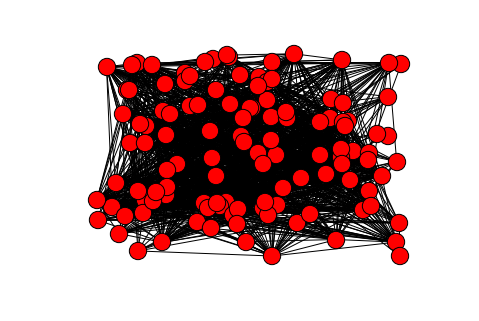

In [89]:
nx.draw_random(s_g[0])

In [ ]:
create_graph_array([G], '/home/richard/git/graphiti/graphiti/graph_data/stocks/stocks_similarity.json')    

#Build Regression Model

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
start_dt = dt.datetime(2006,1,1)
end_dt = dt.datetime(2016,3,22)
symbol = 'AMZN'
daily_data = web.DataReader(symbol, "yahoo", start_dt,end_dt)

In [92]:
daily_data.shape

(2572, 6)

In [93]:
for freq in freqs:
    for t in types:
        daily_data['i_'+ t + '_'+str(freq)] = daily_data[t].pct_change(periods=freq)
daily_data['d_'+ 'Close' + '_'+str(1)] = daily_data['i_'+ 'Close' + '_'+str(1)].shift(-1)

In [94]:
daily_data.shape

(2572, 121)

In [95]:
feats = [f for f in daily_data.columns if 'i_' in f]

In [96]:
target = [f for f in daily_data.columns if 'd_' in f][0]

In [97]:
target

'd_Close_1'

In [98]:
daily_data.ix[-2,target]

0.011733275993114356

In [99]:
df = daily_data.dropna()

In [100]:
df.shape

(2552, 121)

In [101]:
X_train = df.ix[:-3,feats].as_matrix()

In [102]:
X_train.shape

(2549, 114)

In [103]:
Y_train = df.ix[:-3, target].as_matrix()

In [105]:
Y_train

array([-0.01874163, -0.02819459, -0.10318203, ...,  0.00636592,
       -0.00476587, -0.02582412])

In [106]:
lr = LinearRegression()

In [ ]:
X_train.shape;

In [ ]:
Y_train.shape;

In [107]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
change = lr.predict(df.ix[-2,feats])

In [109]:
change[0]

-0.0021990402777942635

In [110]:
df.ix[-3,'Close']*(1+change[0])

558.2097709025926

In [111]:
df.ix[-2,'Close']

552.080017

#Build Classification Models

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
cat_target = [1 if y>0 else 0 for y in Y_train]

In [114]:
logistic = LogisticRegression()

In [115]:
logistic.fit(X_train, cat_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [116]:
pred = logistic.predict(df.ix[-2,feats]) # caveat: No feature selection was done before fitting LR model

In [117]:
pred

array([0])

In [118]:
df.ix[-2, target]

0.0034414630877681596

In [119]:
df.index[-2]

Timestamp('2016-03-18 00:00:00')

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier()

In [122]:
rf.fit(X_train,cat_target);

In [123]:
pred_rf = rf.predict(df.ix[-2,feats])

In [124]:
pred_rf

array([0])

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

In [127]:
GBC = GradientBoostingClassifier()

In [128]:
GBC.fit(X_train,cat_target);

In [129]:
pred_GBC = GBC.predict(df.ix[-2,feats])

In [130]:
pred_GBC

array([0])

In [131]:
feat_impt = GBC.feature_importances_

In [132]:
indx_sorted = sorted(range(len(feats)), key=lambda k: feat_impt[k])

In [133]:
sorted_feat = [feats[i] for i in indx_sorted]

In [134]:
sorted_feat

['i_Low_9',
 'i_Adj Close_10',
 'i_Open_15',
 'i_Low_17',
 'i_Close_17',
 'i_Close_16',
 'i_Close_12',
 'i_Close_19',
 'i_Adj Close_7',
 'i_Close_11',
 'i_Adj Close_16',
 'i_High_17',
 'i_Open_16',
 'i_Low_13',
 'i_Adj Close_11',
 'i_Adj Close_13',
 'i_Adj Close_8',
 'i_Adj Close_12',
 'i_Low_6',
 'i_High_19',
 'i_Close_10',
 'i_Low_5',
 'i_Adj Close_9',
 'i_Open_14',
 'i_Close_8',
 'i_Low_16',
 'i_Close_7',
 'i_High_12',
 'i_Close_13',
 'i_Close_6',
 'i_Close_3',
 'i_Open_4',
 'i_Open_13',
 'i_Open_10',
 'i_High_15',
 'i_Low_7',
 'i_Open_11',
 'i_High_5',
 'i_Low_15',
 'i_Adj Close_17',
 'i_Adj Close_14',
 'i_High_8',
 'i_Low_8',
 'i_Adj Close_6',
 'i_High_11',
 'i_Low_12',
 'i_High_14',
 'i_Close_14',
 'i_High_10',
 'i_High_13',
 'i_Adj Close_18',
 'i_Adj Close_3',
 'i_Adj Close_19',
 'i_High_18',
 'i_Low_3',
 'i_Adj Close_1',
 'i_High_9',
 'i_Close_1',
 'i_Open_8',
 'i_Low_19',
 'i_Open_7',
 'i_Open_6',
 'i_Close_9',
 'i_Adj Close_15',
 'i_Close_5',
 'i_Low_2',
 'i_Low_18',
 'i_Volu

#Feature Dimensionality Reduction

In [135]:
from sklearn.manifold import TSNE

In [136]:
model = TSNE(n_components=2, random_state=0)

In [137]:
X=model.fit_transform(X_train) 

In [138]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [140]:
X.shape

(2549, 2)

In [142]:
Y = np.asarray([0]*(X.shape[0]))

In [143]:
# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

:0: FutureWarning: IPython widgets are experimental and may change in the future.


/home/richard/apps/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


(<matplotlib.figure.Figure at 0x7fb06f8317d0>,
  <matplotlib.text.Text at 0x7fb0640d70d0>])

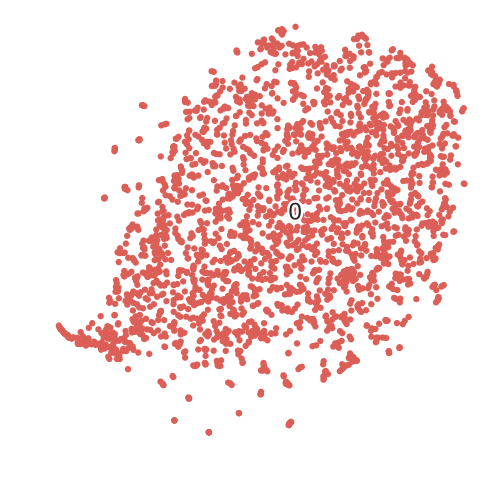

In [144]:
scatter(X, Y)

In [145]:
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion

In [146]:
pca = PCA(n_components=2)
selection = SelectKBest(k=8)
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [147]:
feat_selector = combined_features.fit(X_train, cat_target)

In [148]:
X_features = feat_selector.transform(X_train)

In [149]:
X_train.shape

(2549, 114)

In [150]:
selection

SelectKBest(k=8, score_func=<function f_classif at 0x7fb06f6ab8c0>)

In [151]:
feature_names = [feats[i] for i in selection.get_support(indices=True)]

In [152]:
feature_names

['i_Close_2',
 'i_Adj Close_2',
 'i_Close_3',
 'i_Adj Close_3',
 'i_Close_4',
 'i_Adj Close_4',
 'i_Close_6',
 'i_Adj Close_6']

In [153]:
logistic = LogisticRegression()
logistic.fit(X_features, cat_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [154]:
df.ix[-2,feats].shape

(114,)

In [155]:
test_X_features = feat_selector.transform(df.ix[-2,feats])

In [156]:
pred = logistic.predict(test_X_features) # caveat: No feature selection was done before fitting LR model

In [157]:
pred

array([1])

#ModelValidation (not covered here)